In [1]:
from pandas import *
import matplotlib.pyplot as plt
import seaborn as sns
from ggplot import *

%load_ext rmagic

/Library/Python/2.7/site-packages/IPython/extensions/rmagic.py:693: UserWarning: The rmagic extension in IPython is deprecated in favour of rpy2.ipython. If available, that will be loaded instead.
http://rpy.sourceforge.net/
  warnings.warn("The rmagic extension in IPython is deprecated in favour of "


In [2]:
ls

crime.Rproj                     sampleSubmission.csv            test.csv                        train.csv.zip
crime_exploratory_analysis.Rmd  sampleSubmission.csv.zip        test.csv.zip                    train_model.ipynb
explore.ipynb                   solution.py                     train.csv


In [3]:
train = read_csv('train.csv')
test = read_csv('test.csv')

In [4]:
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [5]:
train.describe(include='all')

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
count,878049,878049,878049,878049,878049,878049,878049,878049.000000,878049.000000
unique,389257,39,879,7,10,17,23228,NaN,NaN
top,2011-01-01 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,SOUTHERN,NONE,800 Block of BRYANT ST,NaN,NaN
freq,185,174900,60022,133734,157182,526790,26533,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.422616,37.771020
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.030354,0.456893
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.513642,37.707879
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.432952,37.752427
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.416420,37.775421
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.406959,37.784369


In [6]:
test.describe(include='all')

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
count,884262.000000,884262,884262,884262,884262,884262.000000,884262.000000
unique,NaN,392173,7,10,23184,NaN,NaN
top,NaN,2010-01-01 00:01:00,Friday,SOUTHERN,800 Block of BRYANT ST,NaN,NaN
freq,NaN,150,134703,157456,26984,NaN,NaN
mean,442130.500000,NaN,NaN,NaN,NaN,-122.422693,37.771476
std,255264.596205,NaN,NaN,NaN,NaN,0.030985,0.484824
min,0.000000,NaN,NaN,NaN,NaN,-122.513642,37.707879
25%,221065.250000,NaN,NaN,NaN,NaN,-122.433069,37.752374
50%,442130.500000,NaN,NaN,NaN,NaN,-122.416517,37.775421
75%,663195.750000,NaN,NaN,NaN,NaN,-122.406959,37.784353


#Univariate Analysis

##Day of Week

In [7]:
train['DayOfWeek'] = train.DayOfWeek.astype('category',
                   categories = ['Monday', 'Tuesday', 'Wednesday', 
                                 'Thursday', 'Friday', 'Saturday', 
                                 'Sunday'])

In [8]:
train.DayOfWeek.value_counts(sort=False)

Monday       121584
Tuesday      124965
Wednesday    129211
Thursday     125038
Friday       133734
Saturday     126810
Sunday       116707
dtype: int64

##Category

In [9]:
train.Category.value_counts()

LARCENY/THEFT                  174900
OTHER OFFENSES                 126182
NON-CRIMINAL                    92304
ASSAULT                         76876
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53781
VANDALISM                       44725
WARRANTS                        42214
BURGLARY                        36755
SUSPICIOUS OCC                  31414
MISSING PERSON                  25989
ROBBERY                         23000
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7326
STOLEN PROPERTY                  4540
SEX OFFENSES FORCIBLE            4388
DISORDERLY CONDUCT               4320
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      2268
RUNAWAY                          1946
LIQUOR LAWS 

##PdDistrict 

In [10]:
train.PdDistrict.value_counts()

SOUTHERN      157182
MISSION       119908
NORTHERN      105296
BAYVIEW        89431
CENTRAL        85460
TENDERLOIN     81809
INGLESIDE      78845
TARAVAL        65596
PARK           49313
RICHMOND       45209
dtype: int64

##Address

In [11]:
addr_train = set(train.Address.unique())

In [12]:
addr_test = set(test.Address.unique())

In [13]:
addr_train.difference(addr_test)

{'KRAMER PL / GREENWICH ST',
 'GUTTENBERG ST / NADELL CT',
 'DIAMOND ST / CESAR CHAVEZ ST',
 'GELLERT DR / MORNINGSIDE DR',
 'CABRILLO ST / 40TH AV',
 '400 Block of SAINT FRANCIS BL',
 'LUCY ST / THORNTON AV',
 '0 Block of SANTA PAULA AV',
 'SILVER AV / CAMELLIA AV',
 '300 Block of EXECUTIVE PARK BL',
 '2300 Block of GRIFFITH ST',
 '100 Block of ELK ST',
 'SOUTH HILL BL / CHICAGO WY',
 'JARBOE AV / BANKS ST',
 'ARBOR ST / DIAMOND ST',
 'SPRING ST / CALIFORNIA ST',
 '0 Block of FARNSWORTH LN',
 '0 Block of SAN LORENZO WY',
 'SANTAANA AV / DARIEN WY',
 'JUSTIN DR / AGNON AV',
 'JOOST AV / LIPPARD AV',
 'DE HARO ST / 25TH ST',
 '19TH AV / MONTICELLO ST',
 'SACRAMENTO ST / BROOKLYN PL',
 'PORTOLA DR / DELSUR AV',
 '0 Block of ILLINOIS ST',
 'KIRKHAM ST / 23RD AV',
 '100 Block of ST FRANCIS BL',
 'CORBETT AV / CUESTA CT',
 'UNION ST / CADELL PL',
 'DEHARO ST / KING ST',
 'TANDANG SORA ST / RIZAL ST',
 'DELANO AV / MOUNT VERNON AV',
 'MEADOWBROOK DR / EUCALYPTUS DR',
 'HARDING RD / SKYLINE B

In [14]:
addr_test.difference(addr_train)

{'BELLAIR PL / PFEIFFER ST',
 'LABICA WY / ROCKDALE DR',
 '2200 Block of GREAT HWY',
 'DOLORES ST / HIDALGO TR',
 'SWEENY ST / COLBY ST',
 '300 Block of HUNTERSPOINT BL',
 'SKYLINE BLVD HY / HARDING RD',
 'LEGIONOFHONOR DR / ELCAMINODELMAR ST',
 'TEDDY AV / ALPHA ST',
 'DOUGLASS ST / JERSEY ST',
 '1500 Block of LOWER GREAT HY',
 'JOSIAH AV / SUMMIT ST',
 'SAINT ELMO WY / MONTEREY BL',
 'FUNSTON AV / PACHECO ST',
 '3500 Block of UPPER GREAT HY',
 'ARCH ST / HOLLOWAY AV',
 'FORESTVIEW DR / OCEAN AV',
 'BELVEDERE ST / CARMEL ST',
 'FAIR OAKS ST / 21ST ST',
 'SEARS ST / LAWRENCE AV',
 'CHARTEROAK AV / SILVER AV',
 'FAIRMOUNT ST / MIGUEL ST',
 'TOPEKA AV / REDDY ST',
 'EUCALYPTUS DR / EVERGLADE DR',
 'SAMOSET ST / RIPLEY ST',
 'UPPER TR / MONUMENT WY',
 'ORDWAY ST / GOETTINGEN ST',
 'YERBABUENA AV / STELMO WY',
 'THE EMBARCADERO NORTH ST / STOCKTON ST',
 'INNES AV / HUNTERS POINT BL',
 'SANFERNANDO WY / SAINT FRANCIS BL',
 'CESAR CHAVEZ ST / DOUGLASS ST',
 'CHAINOFLAKES DR / FULTON ST',
 'L

##Date Time

In [15]:
train['Dates'] = to_datetime(train['Dates'])

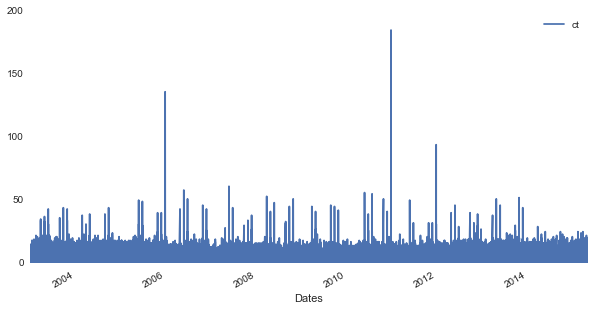

In [16]:
train.assign(ct = 1).groupby('Dates', as_index=0)['ct'].sum()\
    .set_index('Dates')\
    .plot(figsize = (10, 5))